In [1]:
import numpy as np
import glob
import cv2
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.filters import sobel

SIZE = 128

In [2]:
train_img = []
train_label = [] 
for dir_path in glob.glob("Dataset/train/*"):
    label = dir_path.split("/")[-1]
    print(label)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        train_img.append(img)
        train_label.append(label)
        
train_img = np.array(train_img)
train_label = np.array(train_label)

with_mask
Dataset/train/with_mask/with_mask (94).jpg
Dataset/train/with_mask/with_mask (123).jpg
Dataset/train/with_mask/with_mask (20).jpg
Dataset/train/with_mask/with_mask (91).jpg
Dataset/train/with_mask/with_mask (189).jpg
Dataset/train/with_mask/with_mask (113).jpg
Dataset/train/with_mask/with_mask (28).jpg
Dataset/train/with_mask/with_mask (112).jpg
Dataset/train/with_mask/with_mask (153).jpg
Dataset/train/with_mask/with_mask (158).jpg
Dataset/train/with_mask/with_mask (130).jpg
Dataset/train/with_mask/with_mask (177).jpg
Dataset/train/with_mask/with_mask (195).jpg
Dataset/train/with_mask/with_mask (115).jpg
Dataset/train/with_mask/with_mask (180).jpg
Dataset/train/with_mask/with_mask (8).jpg
Dataset/train/with_mask/with_mask (62).jpg
Dataset/train/with_mask/with_mask (140).jpg
Dataset/train/with_mask/with_mask (100).jpg
Dataset/train/with_mask/with_mask (197).jpg
Dataset/train/with_mask/with_mask (79).jpg
Dataset/train/with_mask/with_mask (186).jpg
Dataset/train/with_mask/with_m

Dataset/train/without_mask/without_mask (186).jpg
Dataset/train/without_mask/without_mask (112).jpg
Dataset/train/without_mask/without_mask (75).jpg
Dataset/train/without_mask/without_mask (8).jpg
Dataset/train/without_mask/without_mask (28).jpg
Dataset/train/without_mask/without_mask (89).jpg
Dataset/train/without_mask/without_mask (147).jpg
Dataset/train/without_mask/without_mask (66).jpg
Dataset/train/without_mask/without_mask (39).jpg
Dataset/train/without_mask/without_mask (151).jpg
Dataset/train/without_mask/without_mask (159).jpg
Dataset/train/without_mask/without_mask (74).jpg
Dataset/train/without_mask/without_mask (180).jpg
Dataset/train/without_mask/without_mask (21).jpg
Dataset/train/without_mask/without_mask (105).jpg
Dataset/train/without_mask/without_mask (133).jpg
Dataset/train/without_mask/without_mask (196).jpg
Dataset/train/without_mask/without_mask (132).jpg
Dataset/train/without_mask/without_mask (163).jpg
Dataset/train/without_mask/without_mask (12).jpg
Dataset/tr

In [3]:
test_img = []
test_label = [] 
for dir_path in glob.glob("Dataset/test/*"):
    label2 = dir_path.split("/")[-1]
    print(label2)
    for img_path in glob.glob(os.path.join(dir_path, "*.jpg")):
        print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        test_img.append(img)
        test_label.append(label2)
        
test_img = np.array(test_img)
test_label = np.array(test_label)

with_mask
Dataset/test/with_mask/with_mask (94).jpg
Dataset/test/with_mask/with_mask (20).jpg
Dataset/test/with_mask/with_mask (91).jpg
Dataset/test/with_mask/with_mask (28).jpg
Dataset/test/with_mask/with_mask (8).jpg
Dataset/test/with_mask/with_mask (62).jpg
Dataset/test/with_mask/with_mask (100).jpg
Dataset/test/with_mask/with_mask (79).jpg
Dataset/test/with_mask/with_mask (13).jpg
Dataset/test/with_mask/with_mask (18).jpg
Dataset/test/with_mask/with_mask (67).jpg
Dataset/test/with_mask/with_mask (1).jpg
Dataset/test/with_mask/with_mask (11).jpg
Dataset/test/with_mask/with_mask (61).jpg
Dataset/test/with_mask/with_mask (35).jpg
Dataset/test/with_mask/with_mask (87).jpg
Dataset/test/with_mask/with_mask (57).jpg
Dataset/test/with_mask/with_mask (60).jpg
Dataset/test/with_mask/with_mask (73).jpg
Dataset/test/with_mask/with_mask (6).jpg
Dataset/test/with_mask/with_mask (22).jpg
Dataset/test/with_mask/with_mask (81).jpg
Dataset/test/with_mask/with_mask (85).jpg
Dataset/test/with_mask/wit

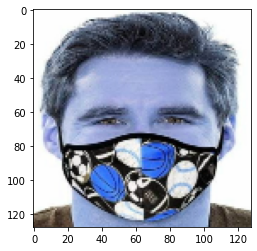

In [4]:
plt.imshow(train_img[0])

In [5]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[1]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
#         print(imagePadded)
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output

In [6]:
def sobel_detection(img):
    g_x = [[1, 0, -1]
          ,[2, 0, -2]
          ,[3, 0, -3]]
    
    g_y = [[1, 2, 3]
         ,[0, 0, 0]
         ,[-1, -2, -3]]
    
    h_x = convolve2D(img, g_x, padding=1)
    h_y = convolve2D(img, g_y, padding=1)
    
    sobel = (h_x**2 + h_y**2)**0.5 % 256
    
    return sobel

In [7]:
def rgb_sobel_detection(img):
    b = img[:, :, 0]
    g = img[:, :, 1]
    r = img[:, :, 2]
    
    sobel_b = sobel_detection(b)
#     print(sobel_b)
    sobel_g = sobel_detection(g)
#     print(sobel_g)
    sobel_r = sobel_detection(r)
#     print(sobel_r)
    
    sobel_img = np.dstack((sobel_b, sobel_g, sobel_r)).astype(int)
    return sobel_img

In [8]:
sob = rgb_sobel_detection(train_img[0])

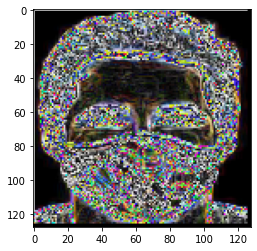

In [9]:
plt.imshow(sob)

In [10]:
def feature_extractor(dataset):
    x_train = dataset
    img_dataset = pd.DataFrame()
    for image in range(x_train.shape[0]):
        
        df = pd.DataFrame()
        
        input_img = x_train[image, :,:,:]
        img = input_img
   
        # FEATURE 1 - Pixel values
        pixel_values = img.reshape(-1)
        df['Pixel_Value'] = pixel_values/255

        # FEATURE 2 Sobel
        edge_sobel = rgb_sobel_detection(img)
        edge_sobel1 = edge_sobel.reshape(-1)
        df['Sobel'] = edge_sobel1/255

        img_dataset = img_dataset.append(df)
        
    return img_dataset

In [11]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_label)
test_encoded = le.transform(test_label)
le.fit(train_label)
train_encoded = le.transform(train_label)

x_train, y_train, x_test, y_test = train_img, train_encoded, test_img, test_encoded

In [12]:
image_features = feature_extractor(x_train)

n_features = image_features.shape[1]
image_features = np.expand_dims(image_features, axis=0)
X_svm = np.reshape(image_features, (x_train.shape[0], -1)) 

from sklearn import svm
SVM_model = svm.SVC(decision_function_shape='ovo')
SVM_model.fit(X_svm, y_train)

SVC(decision_function_shape='ovo')

In [13]:
test_features = feature_extractor(x_test)
test_features = np.expand_dims(test_features, axis=0)
test_for_svm = np.reshape(test_features, (x_test.shape[0], -1))

test_prediction = SVM_model.predict(test_for_svm)

test_prediction = le.inverse_transform(test_prediction)

In [14]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_label, test_prediction))

Accuracy =  0.9473684210526315


<AxesSubplot:>

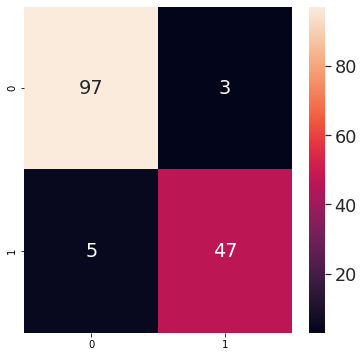

In [15]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_label, test_prediction)

fig, ax = plt.subplots(figsize=(6,6))
sns.set(font_scale=1.6)
sns.heatmap(cm, annot=True, ax=ax)
